<a href="https://colab.research.google.com/github/Whereamiactually/lyceumcompling11/blob/main/NLTK_WordNet_FrameNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NLTK

Natural Language Toolkit (набор инструментов для естественной обработки языка) - пакет библиотек и программ для обработки естественного языка (токенизация, стемминг, лемматизация, POS-тэггинг, графическое представление структуры, семантические рассуждения, ...).

In [2]:
!pip install nltk

In [ ]:
pip install svgling # понадобится для NER

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.1 MB/s eta 0:00:00


In [4]:
import nltk
nltk.download('punkt') # для word_tokenize
nltk.download('averaged_perceptron_tagger') # для pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Recap

Вспомним про то, как получить частотность слов, а также про то, как отбросить самые частотные "бессмысленные" слова (stopwords).

Brown University Standard Corpus of Present-Day American English (Brown Corpus) - корпус текстов на американском английском, первый структурированный корпус текстов разных жанров (1967).

In [ ]:
nltk.download('brown')
brown = nltk.corpus.brown
brown.words()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [ ]:
frequency = nltk.FreqDist(brown.words())

In [ ]:
frequency.most_common(30)

[('the', 62713),
 (',', 58334),
 ('.', 49346),
 ('of', 36080),
 ('and', 27915),
 ('to', 25732),
 ('a', 21881),
 ('in', 19536),
 ('that', 10237),
 ('is', 10011),
 ('was', 9777),
 ('for', 8841),
 ('``', 8837),
 ("''", 8789),
 ('The', 7258),
 ('with', 7012),
 ('it', 6723),
 ('as', 6706),
 ('he', 6566),
 ('his', 6466),
 ('on', 6395),
 ('be', 6344),
 (';', 5566),
 ('I', 5161),
 ('by', 5103),
 ('had', 5102),
 ('at', 4963),
 ('?', 4693),
 ('not', 4423),
 ('are', 4333)]

Ну такое. Суть потерялась по дороге. Напишем код, который убирает stopwords и пунктуацию.

In [ ]:
nltk.download("stopwords")
stops = list(set(nltk.corpus.stopwords.words("english")))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stops.sort()
stops

In [ ]:
import string
punct = list(string.punctuation)
punct

In [ ]:
frequency = nltk.FreqDist([w for w in brown.words() if w.lower() not in list(stops) + punct + ['``', "''", '--']])
frequency.most_common(25)

# Стемминг и лемматизация

Поделим на слова небольшой текст, используя `nltk.word_tokenize()`. Но вначале уберём пунктуацию с помощью регулярных выражений.

In [ ]:
import re

In [ ]:
text = """Tell me, O Muse, of the man of many devices, who wandered full many ways after he had sacked
the sacred citadel of Troy. Many were the men whose cities he saw and whose mind he learned, aye, and many
the woes he suffered in his heart upon the sea, seeking to win his own life and the return of his comrades.
"""
text_wo_punct = re.sub(r'[^\w\s]', '', text)
print(text_wo_punct)

Tell me O Muse of the man of many devices who wandered full many ways after he had sacked
the sacred citadel of Troy Many were the men whose cities he saw and whose mind he learned aye and many
the woes he suffered in his heart upon the sea seeking to win his own life and the return of his comrades



Мы могли бы сделать то же самое с помощью метода `translate()`.

In [ ]:
import string
string.punctuation # строка со всеми знаками пунктуации

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
text_wo_punct = text.translate(str.maketrans('', '', string.punctuation)) # заменяет ''(1) на ''(2) и убирает пунктуацию
print(text_wo_punct)

Tell me O Muse of the man of many devices who wandered full many ways after he had sacked
the sacred citadel of Troy Many were the men whose cities he saw and whose mind he learned aye and many
the woes he suffered in his heart upon the sea seeking to win his own life and the return of his comrades



In [ ]:
tokens = nltk.word_tokenize(text_wo_punct)
tokens

Разметим части речи у выделенных нами слов. На этой [картинке](https://github.com/Whereamiactually/lyceumcompling11/blob/main/POS%20tags%20(NLTK).png) дана расшифровка всех условных сокращений с примерами из английского языка.




In [ ]:
tagged_tokens = nltk.pos_tag(tokens)
tagged_tokens

[('Tell', 'VB'),
 ('me', 'PRP'),
 ('O', 'NNP'),
 ('Muse', 'NNP'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('man', 'NN'),
 ('of', 'IN'),
 ('many', 'JJ'),
 ('devices', 'NNS'),
 ('who', 'WP'),
 ('wandered', 'VBD'),
 ('full', 'JJ'),
 ('many', 'JJ'),
 ('ways', 'NNS'),
 ('after', 'IN'),
 ('he', 'PRP'),
 ('had', 'VBD'),
 ('sacked', 'VBN'),
 ('the', 'DT'),
 ('sacred', 'JJ'),
 ('citadel', 'NN'),
 ('of', 'IN'),
 ('Troy', 'NNP'),
 ('Many', 'NNP'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('men', 'NNS'),
 ('whose', 'WP$'),
 ('cities', 'NNS'),
 ('he', 'PRP'),
 ('saw', 'VBD'),
 ('and', 'CC'),
 ('whose', 'WP$'),
 ('mind', 'NN'),
 ('he', 'PRP'),
 ('learned', 'VBD'),
 ('aye', 'RB'),
 ('and', 'CC'),
 ('many', 'JJ'),
 ('the', 'DT'),
 ('woes', 'NNS'),
 ('he', 'PRP'),
 ('suffered', 'VBD'),
 ('in', 'IN'),
 ('his', 'PRP$'),
 ('heart', 'NN'),
 ('upon', 'IN'),
 ('the', 'DT'),
 ('sea', 'NN'),
 ('seeking', 'VBG'),
 ('to', 'TO'),
 ('win', 'VB'),
 ('his', 'PRP$'),
 ('own', 'JJ'),
 ('life', 'NN'),
 ('and', 'CC'),
 ('the', 'DT'),

Подсчитайте количество слов каждой части речи.

In [ ]:
number_pos = {}
for pair in tagged_tokens:
  if pair[1] in number_pos:
    number_pos[pair[1]] += 1
  else:
    number_pos[pair[1]] = 1
number_pos

{'VB': 2,
 'PRP': 5,
 'NNP': 4,
 'IN': 7,
 'DT': 6,
 'NN': 7,
 'JJ': 6,
 'NNS': 6,
 'WP': 1,
 'VBD': 6,
 'VBN': 1,
 'WP$': 2,
 'CC': 3,
 'RB': 1,
 'PRP$': 3,
 'VBG': 1,
 'TO': 1}

In [ ]:
from nltk.stem import PorterStemmer

Напишите код, который создаёт словарь, где ключами являются исходные словоформы, а их значениями - их основы (stems).

In [ ]:
stems = {}
ps = PorterStemmer()
for token in tokens:
  stem = ps.stem(token)
  stems[token] = stem
stems

{'Tell': 'tell',
 'me': 'me',
 'O': 'o',
 'Muse': 'muse',
 'of': 'of',
 'the': 'the',
 'man': 'man',
 'many': 'mani',
 'devices': 'devic',
 'who': 'who',
 'wandered': 'wander',
 'full': 'full',
 'ways': 'way',
 'after': 'after',
 'he': 'he',
 'had': 'had',
 'sacked': 'sack',
 'sacred': 'sacr',
 'citadel': 'citadel',
 'Troy': 'troy',
 'Many': 'mani',
 'were': 'were',
 'men': 'men',
 'whose': 'whose',
 'cities': 'citi',
 'saw': 'saw',
 'and': 'and',
 'mind': 'mind',
 'learned': 'learn',
 'aye': 'aye',
 'woes': 'woe',
 'suffered': 'suffer',
 'in': 'in',
 'his': 'hi',
 'heart': 'heart',
 'upon': 'upon',
 'sea': 'sea',
 'seeking': 'seek',
 'to': 'to',
 'win': 'win',
 'own': 'own',
 'life': 'life',
 'return': 'return',
 'comrades': 'comrad'}

Стемминг vs лемматизация: в чём разница?

Это всё способы нормализации.

Лемма - словарная форма слова. Лемматизация учитывает морфологический анализ слов и использует словарь.

Стемминг работает, не учитывая контекст и морфологические характеристики слова, а просто грубо отсекает "лишнее" от корней слов, в том числе и словообразовательные суффиксы.

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...


Создайте словарь, где ключами являются исходные словоформы, а их значениями - их леммы.

In [ ]:
lemmas = {}
wl = WordNetLemmatizer()
for token in tokens:
  lemma = wl.lemmatize(token)
  lemmas[token] = lemma
lemmas

{'Tell': 'Tell',
 'me': 'me',
 'O': 'O',
 'Muse': 'Muse',
 'of': 'of',
 'the': 'the',
 'man': 'man',
 'many': 'many',
 'devices': 'device',
 'who': 'who',
 'wandered': 'wandered',
 'full': 'full',
 'ways': 'way',
 'after': 'after',
 'he': 'he',
 'had': 'had',
 'sacked': 'sacked',
 'sacred': 'sacred',
 'citadel': 'citadel',
 'Troy': 'Troy',
 'Many': 'Many',
 'were': 'were',
 'men': 'men',
 'whose': 'whose',
 'cities': 'city',
 'saw': 'saw',
 'and': 'and',
 'mind': 'mind',
 'learned': 'learned',
 'aye': 'aye',
 'woes': 'woe',
 'suffered': 'suffered',
 'in': 'in',
 'his': 'his',
 'heart': 'heart',
 'upon': 'upon',
 'sea': 'sea',
 'seeking': 'seeking',
 'to': 'to',
 'win': 'win',
 'own': 'own',
 'life': 'life',
 'return': 'return',
 'comrades': 'comrade'}

Хм, работает не совсем так, как нам бы хотелось! Хотя как будто лучше, чем стемминг.

Следующий код сравнивает обработку стеммингом с обработкой лемматизацией.

In [ ]:
dict_compare = {}
for i in stems:
  if stems[i] != lemmas[i]:
    dict_compare[stems[i]] = lemmas[i]
dict_compare

{'tell': 'Tell',
 'o': 'O',
 'muse': 'Muse',
 'mani': 'Many',
 'devic': 'device',
 'wander': 'wandered',
 'sack': 'sacked',
 'sacr': 'sacred',
 'troy': 'Troy',
 'citi': 'city',
 'learn': 'learned',
 'suffer': 'suffered',
 'hi': 'his',
 'seek': 'seeking',
 'comrad': 'comrade'}

Как видно, стемминг, в отличие от лемматизации, хорошо справляется с обработкой глаголов. Это так потому, что для корректной работы лемматизации ей необходимо давать информацию о части речи обрабатываемого ею слова. Иначе  она считает, что слово является существительным.

In [ ]:
def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
      return wordnet.ADJ
    elif nltk_tag.startswith('V'):
      return wordnet.VERB
    elif nltk_tag.startswith('N'):
      return wordnet.NOUN
    elif nltk_tag.startswith('R'):
      return wordnet.ADV
    else:
      return None

def lemmatize_w_pos(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_dict = {}
    for word, tag in wordnet_tagged:
        if tag is None:
          lemmatized_dict[word] = word
        else:
          lemmatized_dict[word] = wl.lemmatize(word, tag)
    return lemmatized_dict

lemmatize_w_pos(text_wo_punct)

{'Tell': 'Tell',
 'me': 'me',
 'O': 'O',
 'Muse': 'Muse',
 'of': 'of',
 'the': 'the',
 'man': 'man',
 'many': 'many',
 'devices': 'device',
 'who': 'who',
 'wandered': 'wander',
 'full': 'full',
 'ways': 'way',
 'after': 'after',
 'he': 'he',
 'had': 'have',
 'sacked': 'sack',
 'sacred': 'sacred',
 'citadel': 'citadel',
 'Troy': 'Troy',
 'Many': 'Many',
 'were': 'be',
 'men': 'men',
 'whose': 'whose',
 'cities': 'city',
 'saw': 'saw',
 'and': 'and',
 'mind': 'mind',
 'learned': 'learn',
 'aye': 'aye',
 'woes': 'woe',
 'suffered': 'suffer',
 'in': 'in',
 'his': 'his',
 'heart': 'heart',
 'upon': 'upon',
 'sea': 'sea',
 'seeking': 'seek',
 'to': 'to',
 'win': 'win',
 'own': 'own',
 'life': 'life',
 'return': 'return',
 'comrades': 'comrade'}

NER - Named Entity Recognition.

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

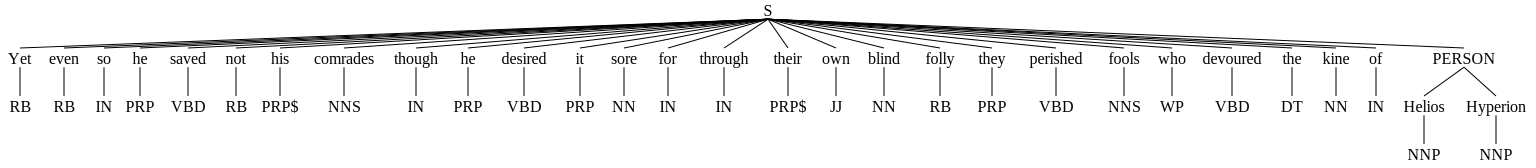

In [ ]:
sentence_1 = """Yet even so he saved not his comrades, though he desired it sore, for through
their own blind folly they perished — fools, who devoured the kine of Helios Hyperion.
"""
sentence_wo_punct_1 = re.sub(r'[^\w\s]', '', sentence_1)
tokens = nltk.word_tokenize(sentence_wo_punct_1)
taggs = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(taggs)
entities

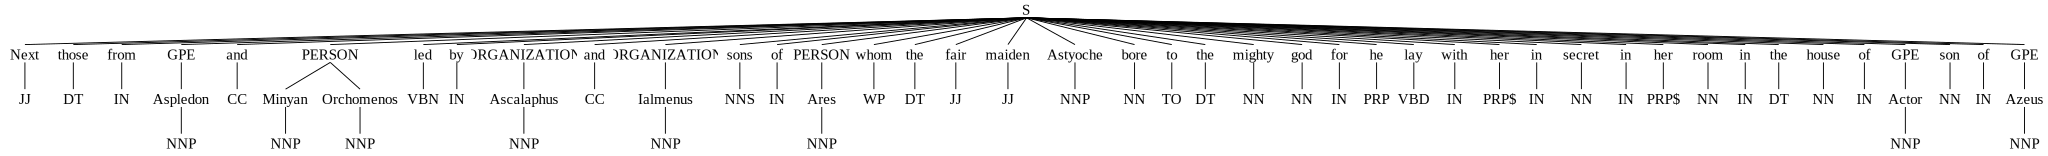

In [ ]:
sentence_2 = """Next those from Aspledon and Minyan Orchomenos, led by Ascalaphus and Ialmenus, sons of Ares whom the fair maiden Astyoche
bore to the mighty god, for he lay with her in secret, in her room in the house of Actor, son of Azeus.
"""
sentence_wo_punct_2 = re.sub(r'[^\w\s]', '', sentence_2)
tokens = nltk.word_tokenize(sentence_wo_punct_2)
taggs = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(taggs)
entities

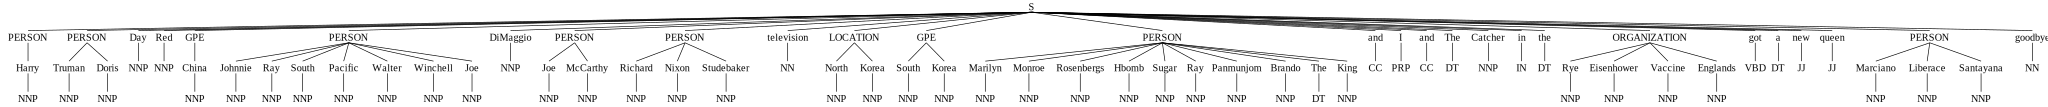

In [ ]:
sentence_3 = """Harry Truman, Doris Day, Red China, Johnnie Ray
South Pacific, Walter Winchell, Joe DiMaggio
Joe McCarthy, Richard Nixon, Studebaker, television
North Korea, South Korea, Marilyn Monroe
Rosenbergs, H-bomb, Sugar Ray, Panmunjom
Brando, "The King and I", and "The Catcher in the Rye"
Eisenhower, Vaccine, England's got a new queen
Marciano, Liberace, Santayana, goodbye.
"""
sentence_wo_punct_3 = re.sub(r'[^\w\s]', '', sentence_3)
tokens = nltk.word_tokenize(sentence_wo_punct_3)
taggs = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(taggs)
entities

А ещё можно рисовать крутые деревья!

In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 18 not upgraded.
Need to get 7,812 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [ ]:
%matplotlib inline

In [ ]:
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-tk is already the newest version (3.10.8-1~22.04).
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript libgs9
  libgs9-common libidn12 libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 10 newly installed, 0 to remove and 18 not upgraded.
Need to get 16.7 MB of archives.
After this operation, 63.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd6

In [ ]:
from nltk.tree import Tree
from IPython.display import display

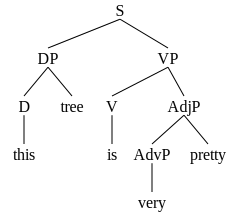

In [ ]:
chunked_sentence = '(S (DP (D this) tree) (VP (V is) (AdjP (AdvP very) pretty)))'
tree = Tree.fromstring(str(chunked_sentence))
display(tree)

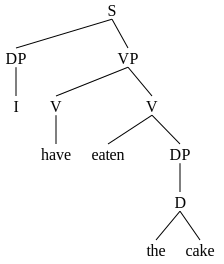

In [ ]:
chunked_sentence_1 = '(S (DP I) (VP (V have) (V eaten (DP (D (the) cake)))))'
tree = Tree.fromstring(str(chunked_sentence_1))
display(tree)

# WordNet

Функция `synsets()` выдает синонимический ряд ("синсет"), объединяющий слова со схожим значением в "узел семантический сети". У каждого синсета есть определение и примеры употребления слов в контексте.

In [ ]:
wordnet.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

Мы можем искать синонимы слов, причём в разных значениях.

In [ ]:
wordnet.synonyms('paper')

[[],
 ['composition', 'report', 'theme'],
 ['newspaper'],
 [],
 [],
 ['newspaper', 'newspaper_publisher'],
 ['newspaper'],
 [],
 ['wallpaper']]

Можем делать это на других языках.

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
wordnet.synonyms('perro', lang = 'spa')

[['can'], []]

[Andiron](https://github.com/Whereamiactually/lyceumcompling11/blob/main/Andiron.png) (или firedog) - это подставка, на которую кладутся брёвна в камин и которая позволяет воздуху циркулировать под ними.

In [ ]:
dog = wordnet.synset('dog.n.01')
dog.hypernyms() # выдаёт гиперонимы

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]

In [ ]:
dog.hyponyms() # выдаёт гипонимы

[Synset('basenji.n.01'),
 Synset('corgi.n.01'),
 Synset('cur.n.01'),
 Synset('dalmatian.n.02'),
 Synset('great_pyrenees.n.01'),
 Synset('griffon.n.02'),
 Synset('hunting_dog.n.01'),
 Synset('lapdog.n.01'),
 Synset('leonberg.n.01'),
 Synset('mexican_hairless.n.01'),
 Synset('newfoundland.n.01'),
 Synset('pooch.n.01'),
 Synset('poodle.n.01'),
 Synset('pug.n.01'),
 Synset('puppy.n.01'),
 Synset('spitz.n.01'),
 Synset('toy_dog.n.01'),
 Synset('working_dog.n.01')]

In [ ]:
face = wordnet.synset('face.n.01')
print(face.part_holonyms()) # выдаёт холонимы

[Synset('head.n.01'), Synset('homo.n.02')]


In [ ]:
face.part_meronyms() # выдаёт меронимы

[Synset('beard.n.01'),
 Synset('brow.n.01'),
 Synset('cheek.n.01'),
 Synset('chin.n.01'),
 Synset('eye.n.01'),
 Synset('eyebrow.n.01'),
 Synset('facial.n.01'),
 Synset('facial_muscle.n.01'),
 Synset('facial_vein.n.01'),
 Synset('feature.n.02'),
 Synset('jaw.n.02'),
 Synset('jowl.n.02'),
 Synset('mouth.n.02'),
 Synset('nose.n.01')]

In [ ]:
dog.root_hypernyms() # находит самый высокий гипероним

[Synset('entity.n.01')]

In [ ]:
wordnet.synset('dog.n.01').lowest_common_hypernyms(wordnet.synset('cat.n.01')) # находит самый низкий уровень, который их объединяет

[Synset('carnivore.n.01')]

In [ ]:
wordnet.synsets('hate')
hate = wordnet.synset('hate.n.01')
hate.root_hypernyms()

[Synset('entity.n.01')]

In [ ]:
wordnet.synset('hate.n.01').lowest_common_hypernyms(wordnet.synset('cat.n.01'))

[Synset('entity.n.01')]

In [ ]:
wordnet.synset('hate.n.01').lowest_common_hypernyms(wordnet.synset('love.n.01'))

[Synset('emotion.n.01')]

In [ ]:
wordnet.synsets('dance')

[Synset('dance.n.01'),
 Synset('dance.n.02'),
 Synset('dancing.n.01'),
 Synset('dance.n.04'),
 Synset('dance.v.01'),
 Synset('dance.v.02'),
 Synset('dance.v.03')]

In [ ]:
dance = wordnet.synset('dance.v.01')
print(dance.hypernyms())
print(dance.hyponyms())
print(dance.root_hypernyms() )
print(wordnet.synset('hate.v.01').lowest_common_hypernyms(wordnet.synset('dance.v.01')))

[Synset('move.v.03')]
[Synset('capriole.v.02'), Synset('chasse.v.01'), Synset('glissade.v.01')]
[Synset('move.v.03')]
[]


Также мы можем получить определение синсета.

In [ ]:
wordnet.synset('dog.n.01').definition()

'a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds'

In [ ]:
wordnet.synset('dog.n.03').definition()

'informal term for a man'

In [ ]:
wordnet.synset('dance.v.01').definition()

'move in a graceful and rhythmical way'

Ещё мы можем посмотреть на "следствия".

In [ ]:
wordnet.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

# FrameNet

FrameNet основывается на теории значения Чарльза Филлмора (1929-2014). Идея проста: значение слов лучше всего представляется с помощью semantic frame (семантической рамки), которая включает в себя описание ситуации, отношения и их участников.

Например, концепт приготовления еды включает в себя **повара**, **еду**, **контейнер**, в котором готовят еду, и **нагревательное приспособление**.

Во FrameNet'e концепт приготовления еды представляется как семантический фрейм **"Apply_heat"**. Участники фрейма (например, **повар**) называются его элементами.

В английском языке существуют несколько глаголов (лексических юнитов), которые используют этот фрейм: например, *fry*, *bake* и *boil*.

Задача FrameNet'a - аннотировать предложения в соответствии с фреймами.

In [5]:
from pprint import pprint
from operator import itemgetter
from nltk.corpus import framenet as fn
from nltk.corpus.reader.framenet import PrettyList
nltk.download('framenet_v17')

[nltk_data] Downloading package framenet_v17 to /root/nltk_data...
[nltk_data]   Unzipping corpora/framenet_v17.zip.


[<frame ID=200 name=Criminal_process>, <frame ID=500 name=Criminal_investigation>, ...]

In [74]:
x = fn.frames(r'(?i)crim') # модификатор, который делает так, что паттерну соответствуют и большие, и маленькие буквы
x.sort(key = itemgetter('ID'))
PrettyList(sorted(x, key = itemgetter('ID')))

[<frame ID=200 name=Criminal_process>, <frame ID=500 name=Criminal_investigation>, ...]

Каждому фрейму даётся описание, использующее элементы фрейма.

In [25]:
f = fn.frame(202)
print(f.name)
pprint(f.definition)

Arrest
('Authorities charge a Suspect, who is under suspicion of having committed a '
 "crime (the Charges), and take him/her into custody.'The police arrested "
 "Harry on charges of manslaughter.'")


In [31]:
pprint(sorted([x for x in f.FE])) # выводит список всех элементов фрейма

['Authorities',
 'Charges',
 'Co-participant',
 'Manner',
 'Means',
 'Offense',
 'Place',
 'Purpose',
 'Source_of_legal_authority',
 'Suspect',
 'Time',
 'Type']


Фреймы также могут состоять между собой в разных отношениях. Существует несколько самых главных видов отношений:

*   **Наследование** (Inheritance). Дочерний фрейм является подтипом родительского фрейма, и каждый элемента родительского фрейма связан с соответствующим элементом дочернего фрейма. Например, фрейм **"Revenge"** ("Отмщение") наследует от фрейма **"Rewards_and_punishments"** ("Награды и наказания").
*   **Использование** (Using). Дочерний фрейм предполагает родительский фрейм в качестве "фона". Например, фрейм **"Speed"** ("Скорость") предполагает фрейм **Motion** ("Движение"). Но не каждые элемент родительского фрейма должен быть связан с элементами дочернего фрейма.
*   **Подфрейм** (Subframe). Дочерный фрейм является подсобытием сложного события, представленного родительским фреймом. Например, у фрейма ("Криминальный процесс") есть подфреймы **"Arrest"** ("Арест"), **"Arraignment"** ("предъявление обвинения") и **"Trial"** ("Суд").
*   **Перспектива** (Perspective). Дочерний фрейм является некоторой перспективой бесперспективного родительского фрейма. Например, фреймы **"Hiring"** ("Найм") и **"Get_a_job"** ("Получить работу") являют собой разные перспективы на фрейм **"Employment_start"** ("Начало трудоустройства") - со стороны работодателя и со стороны соискателя.





In [62]:
pprint(list(f.frameRelations)) # выдаёт фреймы, с которыми наш фрейм состоит в каких-либо отношениях

[<Parent=Intentionally_affect -- Inheritance -> Child=Arrest>,
 <Complex=Criminal_process -- Subframe -> Component=Arrest>,
 <Parent=Arrest -- Using -> Child=Surrendering>,
 <Parent=Inhibit_movement -- Using -> Child=Arrest>,
 <Earlier=Arrest -- Precedes -> Later=Arraignment>]


До этого мы искали фреймы по названию. Но их можно также искать и по лексическому юниту.

In [33]:
PrettyList(sorted(fn.frames_by_lemma(r'(?i)arrest'), key = itemgetter('ID')))

[<frame ID=202 name=Arrest>, <frame ID=313 name=Detaining>, ...]

Слова - не то же самое, что и лексические юниты. Слово может быть одно, а значений у него и, соответственно, лексических юнитов - несколько, и все они могут входить в разные фреймы. Например, лемма *bake.v* привязана к трём фреймам:

* **Apply_heat** ("Применять тепло"): “Michelle baked the potatoes for 45 minutes.” ("Мишель
 45 минут запекала картофель."),

* **Cooking_creation** ("Создание посредством приготовления"): “Michelle baked her mother a cake for her birthday.” ("Мишель испекла своей маме на день рождения пирог."),

* **Absorb_heat** ("Поглощать тепло"): “The potatoes have to bake for more than 30 minutes.” ("Картошка должна запекаться более 30 минут.").



In [34]:
PrettyList(sorted(fn.lus(r'(?i)arrest'), key = itemgetter('ID')))

[<lu ID=4733 name=arrest.v>, <lu ID=5678 name=arrest.n>, ...]

Мы можем найти подробную информацию о лексическом юните.

In [38]:
arrest = fn.lu(4733)
print(arrest.name)
print(arrest.definition)
print(arrest.frame.name)

arrest.v
COD: seize (someone) by legal authority and take them into custody. 
Arrest


Мы можем искать также по прилагательному или наречию. Можем и по существительному, но скорее всего существительное будет являться именно элементом какого-нибудь фрейма, а не самим фреймом или лексическим юнитом.

In [40]:
PrettyList(sorted(fn.lus(r'(?i)asleep'), key = itemgetter('ID')))

[<lu ID=5327 name=asleep.a>]

In [78]:
asleep = fn.lu(5327)
print(asleep.name)
print(asleep.definition)
print(asleep.frame.name)

asleep.a
COD: in or into a state of sleep. 
Sleep


Можем посмотреть примеры.

In [77]:
print(asleep.exemplars)

exemplar sentences for asleep.a in Sleep:

[0] You have been asleep for the past two hours . " 
[1] By this time , Marlin was sound asleep . 
[2] Pascoe was almost asleep . 
[3] All three aunts are fast asleep , snoring and dreaming in unison . 
[4] Bristol Crown Court heard that Jason Levy from Cheltenham set fire to a house in the town after breaking in , while Chloe Robinson was asleep upstairs with her parents . 




In [45]:
sleep = fn.frames(r'(?i)sleep') # модификатор, который делает так, что паттерну соответствуют и большие, и маленькие буквы
sleep.sort(key = itemgetter('ID'))
PrettyList(sorted(sleep, key = itemgetter('ID')))

[<frame ID=264 name=Sleep>, <frame ID=292 name=Fall_asleep>, ...]

In [80]:
asleep = fn.frame(292)
print(asleep.name)
pprint(asleep.definition)
pprint(sorted([x for x in asleep.FE]))

Fall_asleep
('A Sleeper goes from wakefulness to an altered state of consciousness where '
 'they are largely unaware of their environment.  The LUs of this frame are '
 'differentiated by how quickly and deeply the state is entered and what '
 'causes the change (especially whether it comes about naturally as a result '
 "of sleepiness or is brought about by injury).  'I dozed off at about 1am.'")
['Place', 'Sleeper', 'Time']


Во FrameNet'e есть также небольшой корпус размеченных текстов!

In [51]:
d = fn.docs('BellRinging')[0]
d.sentence[48]

full-text sentence (2824245) in BellRinging:


[POS] 19 tags

[POS_tagset] PENN

[text] + [annotationSet]

`` The sound of bells is a net to draw people into the church , 
       *****    *****             **** ******          ******   
       Sensa    Noise             Caus People          Buildi   
       [1]      [4]               [5]  [6]             [2]      

'' he says .
      ****
      Stat
      [3] 
 (Sensa=Sensation, Noise=Noise_makers, Caus=Cause_motion, Buildi=Buildings, Stat=Statement)

In [83]:
d.sentence[:10]

[full-text sentence (2824197) in BellRinging:
 
 
 [POS] 25 tags
 
 [POS_tagset] PENN
 
 [text] + [annotationSet]
 
 The art of change-ringing is peculiar to the English , and , like
     ***                      ********        *******         ****
     Cra                      Idiosync        People_         Simi
     [1]                      [2]             [3]             [4] 
 
  most English peculiarities , unintelligible to the rest of the 
  ****         *************   **************        ****        
  Prop         Idiosyncrasy    Grasp                 Rest        
  [9]          [5]             [6]                   [7]         
 
 world .
 *****
 Polit
 [8]  
  (Cra=Craft, Idiosync=Idiosyncrasy, People_=People_by_origin, Simi=Similarity, Prop=Proportional_quantity, Polit=Political_locales),
 full-text sentence (2824198) in BellRinging:
 
 
 [POS] 9 tags
 
 [POS_tagset] PENN
 
 [text] + [annotationSet]
 
 Dorothy L. Sayers , `` The Nine Tailors ''
  
  
  
 ,
 full-text se